In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import scipy as sc
import copy
import matplotlib.gridspec as gridspec

In [2]:
R = 25

In [3]:
grid = np.zeros((2*R + 1, 2*R+ 1))

In [4]:
#initialize square potential
a = int(4/5 * R)
b = int(6/5 * R)
for x in range(a,b+1):
    grid[a][x] = 1
    grid[b][x] = 1
    grid[x][a] = 1
    grid[x][b]= 1
firstgrid = copy.deepcopy(grid)

In [5]:
mask = grid.astype(bool)
mask[0,:] = True
mask[:,0] = True
mask[2*R,:] = True
mask[:,2*R] = True

In [6]:
(i,j) = np.where(~mask)
maxchange = np.inf
while(maxchange > .001):
    maxchange = 0
    beforegrid = copy.deepcopy(grid)
    grid[i,j] = (grid[i+1,j] + grid[i-1,j] + grid[i,j+1] + grid[i,j-1])/4
    np.seterr(divide = 'ignore') 
    fracchange = abs(beforegrid - grid) / beforegrid
    maxchange = np.nanmax(fracchange)

/var/folders/jj/8x_n1j9n0092tt4yr8mpqdb40000gn/T/ipykernel_40683/1867277535.py:8: RuntimeWarning: invalid value encountered in divide
  fracchange = abs(beforegrid - grid) / beforegrid


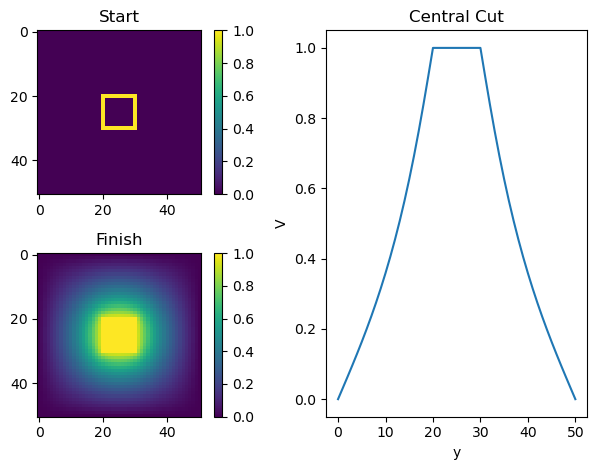

In [9]:
gs = gridspec.GridSpec(2, 2)

pl.figure()
ax = pl.subplot(gs[0, 0])
pl.imshow(firstgrid)
pl.colorbar()
pl.title("Start")

ax = pl.subplot(gs[1, 0])
pl.imshow(grid)
pl.colorbar()
pl.title("Finish")

ax = pl.subplot(gs[:, 1])
pl.plot(range(51),grid[25])
pl.title("Central Cut")
pl.ylabel("V")
pl.xlabel('y')
plt.tight_layout()
